In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("waze_dataset.csv")
data.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [3]:
data.shape

(14999, 13)

In [4]:
data.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [5]:
data.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [6]:
data = data.dropna(subset=['label'])

In [7]:
data.isnull().sum()

ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

In [8]:
data.drop("ID" , axis=1 , inplace=True)

In [9]:
data.head(10)

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [10]:
data['label']=data['label'].map({'retained' : 0 , 'churned' : 1})


In [11]:
data.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,0,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,0,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,0,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,0,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [12]:
data.isnull().sum()

label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

In [13]:
data['label'] = data['label'].astype(int)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  int32  
 1   sessions                 14299 non-null  int64  
 2   drives                   14299 non-null  int64  
 3   total_sessions           14299 non-null  float64
 4   n_days_after_onboarding  14299 non-null  int64  
 5   total_navigations_fav1   14299 non-null  int64  
 6   total_navigations_fav2   14299 non-null  int64  
 7   driven_km_drives         14299 non-null  float64
 8   duration_minutes_drives  14299 non-null  float64
 9   activity_days            14299 non-null  int64  
 10  driving_days             14299 non-null  int64  
 11  device                   14299 non-null  object 
dtypes: float64(3), int32(1), int64(7), object(1)
memory usage: 1.4+ MB


In [15]:
data.duplicated().sum()

0

In [16]:
data['device'].unique()

array(['Android', 'iPhone'], dtype=object)

In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
data['device'] = encoder.fit_transform(data[['device']])

In [18]:
data.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,1.0
1,0,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,0.0
2,0,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,1.0
3,0,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,0.0
4,0,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,1.0


In [19]:
# Separate features and target variable
X = data.drop('label', axis=1)
y = data['label']  

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)


C:\Users\aksha\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred=lr.predict(X_test)
from sklearn.metrics import confusion_matrix , accuracy_score

cm=confusion_matrix(y_test , y_pred)
ac=accuracy_score(y_test , y_pred)
print(cm, "\n", ac)
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

[[2312   41]
 [ 458   49]] 
 0.8255244755244755


In [23]:
data['label'].value_counts()

label
0    11763
1     2536
Name: count, dtype: int64

Accuracy: 0.8248251748251748

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2353
           1       0.53      0.12      0.19       507

    accuracy                           0.82      2860
   macro avg       0.68      0.55      0.55      2860
weighted avg       0.78      0.82      0.78      2860


Confusion Matrix:
[[2300   53]
 [ 448   59]]


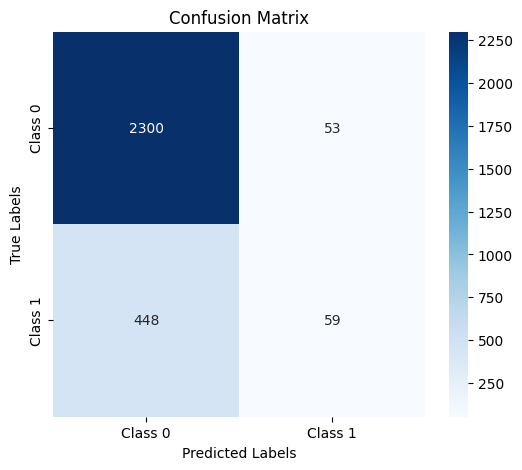

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=69, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred1 = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


c:\Program Files\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.7343 - loss: 23.5739
Epoch 2/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.8186 - loss: 0.5541
Epoch 3/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.8187 - loss: 0.5145
Epoch 4/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.8297 - loss: 0.4688
Epoch 5/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.8234 - loss: 0.4651
Epoch 6/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.8248 - loss: 0.4604
Epoch 7/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.8249 - loss: 0.4582
Epoch 8/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.8198 - loss: 0.4663
Epoch 9/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.8236 - loss: 0.4581
Epoch 10/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.8211 - loss: 0.4620
Epoch 11/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8304 - loss: 0.4424
Epoch 12/100
358/358 ━━━━━━━━━

In [27]:
model.evaluate(X_test, y_test)


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.8249 - loss: 0.4192


[0.40805479884147644, 0.8227272629737854]

In [28]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2353
           1       0.53      0.12      0.19       507

    accuracy                           0.82      2860
   macro avg       0.68      0.55      0.55      2860
weighted avg       0.78      0.82      0.78      2860

